# Numerische Ableitung

## Übungsblatt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate, optimize


def deriv(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)


def deriv_data(x, y):
    dy = np.diff(y)
    dx = np.diff(x)
    dydx = dy / dx
    yprime = np.empty_like(y)
    yprime[1:-1] = (dydx[:-1] + dydx[1:]) / 2
    yprime[0] = dydx[0]
    yprime[-1] = dydx[-1]
    return yprime


### Aufgabe 1: Wasserverbrauchs

Wir schauen uns nochmals die Daten zum Wasserverbrauch an. Das Ziel ist hier die Ableitung (Änderungsrate des Wasserverbrauchs) einerseits direkt aus den Daten zu berechnen und andererseits, die Daten zuerst zu interpolieren und dann die Ableitung der Interpolationsfunktion zu berechnen.

#### a) Daten importieren und darstellen

Importiere die Daten in der Datei `Wasserverbrauch.csv`. Stelle den Wasserverbrauch als Funktion der Zeit dar.

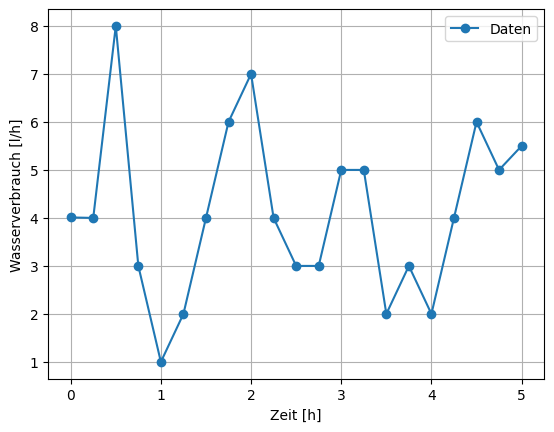

In [3]:
wasserverbrauch = np.loadtxt("Wasserverbrauch.csv", delimiter=";", skiprows=1)
x_data, y_data = wasserverbrauch.T

plt.plot(x_data, y_data, "o-", label="Daten")
plt.xlabel("Zeit [h]")
plt.ylabel("Wasserverbrauch [l/h]")
plt.legend()
plt.grid()
plt.show()


#### b) Interpolieren

Nun greifen wir ein vorhergehendes Thema auf und Interpolieren die Daten im Bereich $x \in [0, 5]$ mit 500 Punkten.

Für das Interpolieren verwenden wir [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) mit `kind="quadratic"`.

Stelle nun die Messwerte (als rote Punkte) und die interpolierten Werte (als verbundene Linie) zusammen dar.

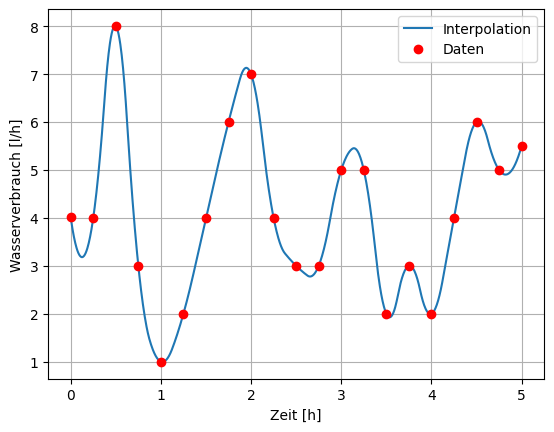

In [4]:
interpolating_func = interpolate.interp1d(x_data, y_data, kind="quadratic")
x_inter = np.linspace(0, 5, 1000)
y_inter = interpolating_func(x_inter)

plt.plot(x_inter, y_inter, label="Interpolation")
plt.plot(x_data, y_data, "ro", label="Daten")
plt.xlabel("Zeit [h]")
plt.ylabel("Wasserverbrauch [l/h]")
plt.legend()
plt.grid()
plt.show()


#### c) Ableiten

Hier soll die Änderungsrate (Ableitung) des Wasserverbrauchs berechnet werden. Die beiden Funktionen `deriv` und `deriv_data` sind aus der Einarbeitung und Vertiefung bekannt. Sie sind zuoberst im Übungsblatt bereits definiert. Schaue sie nochmals an und mache dir klar, wie sie funktionieren und angewendet werden.

1. Berechne die Ableitung der Interpolationsfunktion mithilfe der Funktion `deriv` mit Schrittweite `h=1e-5`.
2. Berechne die Ableitung der Daten mithilfe der Funktion `deriv_data`.
3. Stelle die beiden Ergebnisse zusammen dar (Interpolationsfunktion mit verbundener Linie; Daten-Ableitung mit roten Punkten).

Für die Berechnung und Darstellung der Ableitung der Interpolationsfunktion musst du den Bereich etwas einschränken, z.B. $x\in [0.01, 4.99]$. Alternativ könntest du beim Erzeugen der Interpolationsfunktion in `interp1d` die Option `fill_value="extrapolate"` setzen, um eine Extrapolation zuzulassen.

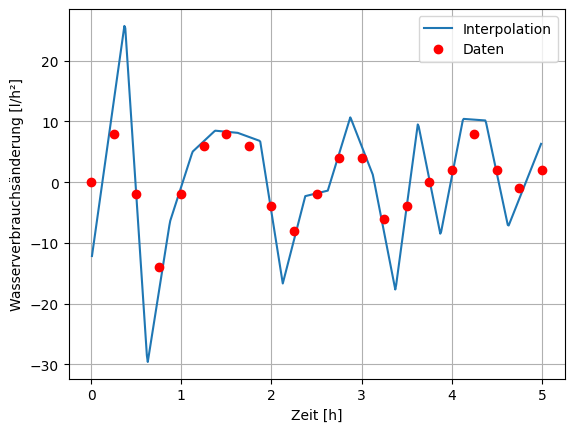

In [5]:
x_inter = np.linspace(0.01, 4.99, 500)
yprime_inter = deriv(interpolating_func, x_inter)
yprime_data = deriv_data(x_data, y_data)

plt.plot(x_inter, yprime_inter, label="Interpolation")
plt.plot(x_data, yprime_data, "ro", label="Daten")
plt.xlabel("Zeit [h]")
plt.ylabel("Wasserverbrauchsänderung [l/h²]")
plt.grid()
plt.legend()
plt.show()


#### d) Extrema der Änderungsrate

Finde die Zeitpunkte mit der größten Zunahme bzw. Abnhame des Wasserverbrauchs anhand der Ableitung der Interpolationsfunktion.

*Hinweis:* Nutze dazu die Funktion [`np.argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [6]:
i_min = np.argmin(yprime_inter)
i_max = np.argmax(yprime_inter)
print("maximale Abnahme:", (x_inter[i_min], yprime_inter[i_min]))
print("maximale Zunahme:", (x_inter[i_max], yprime_inter[i_max]))


maximale Abnahme: (0.6287575150300602, -29.61893409998417)
maximale Zunahme: (0.3692785571142285, 25.731653509897253)


### Aufgabe 2: Bolts Geschwindigkeit

Hierfür schauen wir uns die Daten von Usain Bolts Weltrekord von 2009 an. Diese findet ihr in der Datei `Bolt-100m.csv`.

Das Ziel hier ist aus Messungen des Weg-Zeit-Diagramms die Geschwindigkeit zu berechnen. Daraus bestimmen wir den Zeitpunkt der maximalen Geschwindigkeit, indem wir die Nullstelle der Beschleunigung bestimmen. 

#### a) Daten importieren

Lade die Daten. Gemessen wurde die Zeit $t$ in s (zweite Spalte) zu spezifischen Distanzen $d$ in m (erste Spalte).

In [7]:
bolt = np.loadtxt("Bolt-100m.csv", delimiter=",", skiprows=1)
d, t = bolt.T


#### b) Geschwindigkeit (Ableitung) berechnen 

1. Berechne die Geschwindigkeit $v$ in m/s, indem Du die numerische Ableitung $v=d'(t)$ mit der passenden Methode berechnest.
2. Stelle $d$ und $v$ als Funktionen von $t$ übereinander in einem Diagramm dar.

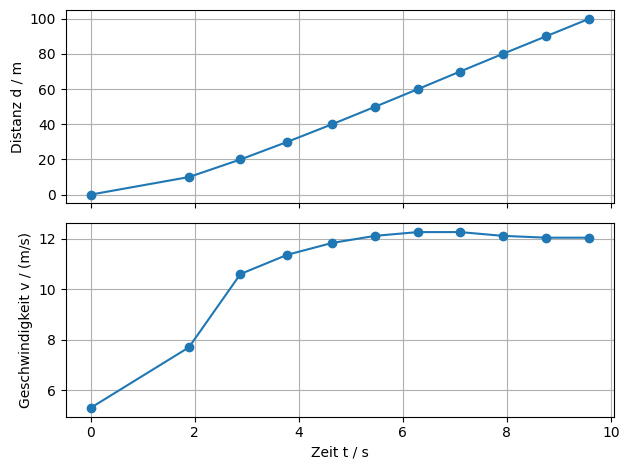

In [8]:
v = deriv_data(t, d)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, d, "o-")
ax1.set_ylabel("Distanz d / m")
ax1.grid()
ax2.plot(t, v, "o-")
ax2.set_xlabel("Zeit t / s")
ax2.set_ylabel("Geschwindigkeit v / (m/s)")
ax2.grid()
plt.tight_layout()
plt.show()


#### c) Geschwindigkeit interpolieren

Anstatt die Ableitung der Geschwindigkeit direkt aus den Daten zu berechnen, nutzen wir dazu eine Interpolation.

1. Konstuiere mit `scipy.interpolate.interp1d` eine Interpolationsfunktion.
2. Setze dabei die Option `fill_value="extrapolate"`, damit die Interpolationsfunktion auch extrapolieren darf.
3. Brobiere aus, welche Interpolationsmethode (`kind`) ein sinnvolles Resultat liefert.
4. Füge den Graph der Interpolationsfunktion (500 Punkte) zum Diagramm von b) hinzu.

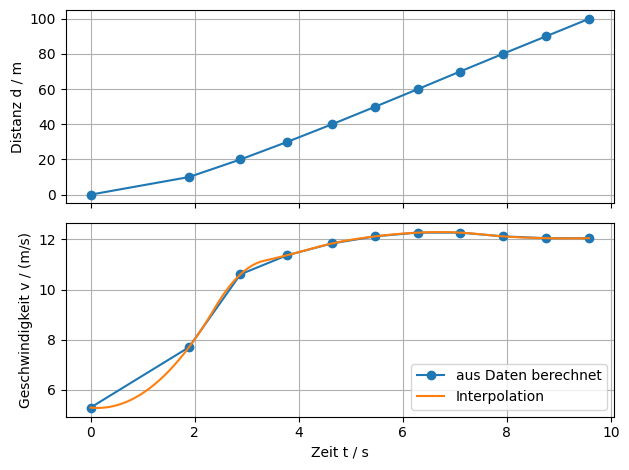

In [9]:
v_interpolated = interpolate.interp1d(t, v, kind="quadratic", fill_value="extrapolate")
t_fine = np.linspace(t.min(), t.max(), 500)
v_fine = v_interpolated(t_fine)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, d, "o-")
ax1.set_ylabel("Distanz d / m")
ax1.grid()
ax2.plot(t, v, "o-", label="aus Daten berechnet")
ax2.plot(t_fine, v_fine, "-", label="Interpolation")
ax2.set_xlabel("Zeit t / s")
ax2.set_ylabel("Geschwindigkeit v / (m/s)")
ax2.legend()
ax2.grid()
plt.tight_layout()
plt.show()


#### d) Beschleunigung berechnen

1. Berechne die Beschleunigung als Ableitung der interpolierten Geschwindigkeit, $a=v'(t)$, mit der passenden Methode.
2. Erweitere die Darstellung von Oben um ein drittes Koordinatensystem mit der Beschleunigung.

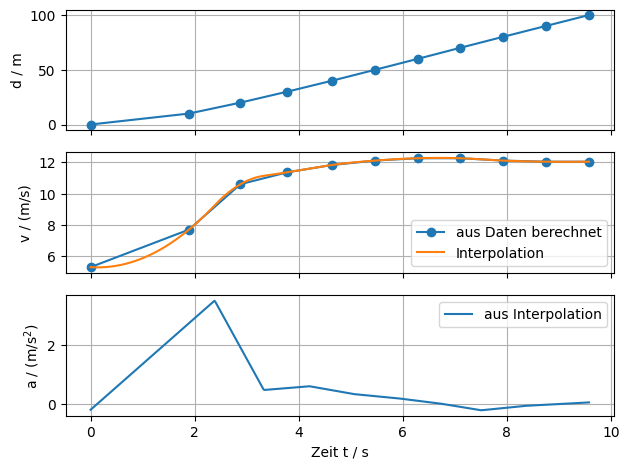

In [10]:
a_fine = deriv(v_interpolated, t_fine, h=1e-6)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(t, d, "o-")
ax1.set_ylabel("d / m")
ax1.grid()
ax2.plot(t, v, "o-", label="aus Daten berechnet")
ax2.plot(t_fine, v_fine, "-", label="Interpolation")
ax2.set_ylabel("v / (m/s)")
ax2.legend()
ax2.grid()
ax3.plot(t_fine, a_fine, "-", label="aus Interpolation")
ax3.set_xlabel("Zeit t / s")
ax3.set_ylabel("a / (m/s$^2$)")
ax3.legend()
ax3.grid()
plt.tight_layout()
plt.show()


#### e) Nullstelle der Beschleunigung (optional)

Die maximale Geschwindigkeit liegt bei der ersten Nullstelle der Beschleunigung. Bei der zweiten Nullstelle hat die Geschwindigkeit ein (sehr flaches) lokales Minimum.

1. Konstuiere eine lineare Interpolationsfunktion der Beschleunigung aus Teil d).
2. Finde die erste Nullstelle dieser Interpolation mithife von `scipy.optimize.newton` und einer groben Schätzung von Auge.
3. Berechne die maximale Geschwindigkeit mithilfe der Interpolationsfunktion.
4. Stelle dieses Maximum als roten Punkt im Diagramm (bei $v$ und bei $a$) dar. 

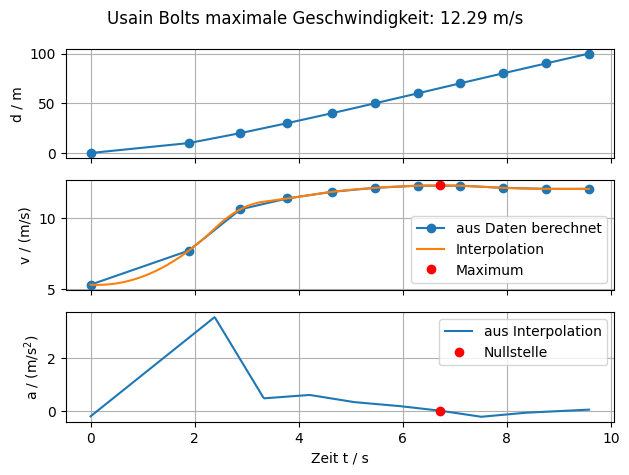

In [11]:
a_interpolated = interpolate.interp1d(t_fine, a_fine, kind="linear", fill_value="extrapolate")

t0 = optimize.newton(a_interpolated, 6)
v0 = v_interpolated(t0)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(t, d, "o-")
ax1.set_ylabel("d / m")
ax1.grid()
ax2.plot(t, v, "o-", label="aus Daten berechnet")
ax2.plot(t_fine, v_fine, "-", label="Interpolation")
ax2.plot(t0, v0, "ro", label="Maximum")
ax2.set_ylabel("v / (m/s)")
ax2.legend()
ax2.grid()
ax3.plot(t_fine, a_fine, "-", label="aus Interpolation")
ax3.plot(t0, 0, "ro", label="Nullstelle")
ax3.set_xlabel("Zeit t / s")
ax3.set_ylabel("a / (m/s$^2$)")
ax3.legend()
ax3.grid()
plt.suptitle(f"Usain Bolts maximale Geschwindigkeit: {v0:.2f} m/s")
plt.tight_layout()
plt.show()
